# Studio di predizione dei crimini ad Orlando

###### Programmazione di Applicazioni Data Intensive

Romanelli Aurora
Matricola: 0000803220
aurora.romanelli3@studio.unibo.it

In [1]:
import numpy as np
import pandas as pd 
import csv
import datetime
import seaborn as sns

Eseguo l'upload del file contenente informazioni relative a crimini avvenuti nell'arco temporale di 6 anni (2010-2016)

In [2]:
df = pd.read_csv (r'OPD_Crimes.csv')

In [3]:
df['Case_Offense_Location_Type'] .value_counts().head(20)

Apartment/Condo                34446
Residence/Single               24616
Highway/Road/Alley             22658
Department/Discount Store      11096
Parking Lot - Surface           8663
Commercial/Office Building      7463
Bar/Night Club/Country Club     5860
Airport                         5827
Hotel/Motel                     5086
Convenience Store               4622
Mall                            3880
School                          3276
Grocery/Supermarket             3037
Theme Park                      2883
Specialty Store                 2835
Motor Vechicle                  2630
Residence/Other                 2498
Restaurant/Fine Dining          2339
Field/Woods                     1836
Drug Store                      1828
Name: Case_Offense_Location_Type, dtype: int64

In [4]:
df.head()

Case_Number          Case_Date_Time                      Case_Location  \
0  2010-00800219  01/28/2010 12:47:00 PM  4100 Block of N ORANGE BLOSSOM TL   
1  2010-00800220  01/28/2010 12:54:00 PM  4100 Block of N ORANGE BLOSSOM TL   
2  2010-00800221  01/28/2010 01:02:00 PM  4100 Block of N ORANGE BLOSSOM TL   
3  2010-00178297  04/16/2010 12:50:00 PM  4000 Block of N ORANGE BLOSSOM TL   
4  2010-00193916  04/25/2010 06:41:00 PM      4800 Block of PHEASANT RUN DR   

  Case_Offense_Location_Type Case_Offense_Category  Case_Offense_Type  \
0          Construction Site                 Theft  All other larceny   
1             Industrial/Mfg                 Theft  All other larceny   
2             Industrial/Mfg                 Theft  All other larceny   
3          Bus/Rail Terminal               Robbery            Robbery   
4           Residence/Single               Assault     Simple assault   

  Case_Offense_Charge_Type Case_Disposition    Status Location  \
0                Committed           Closed  Unmapped      NaN   
1                Committed           Closed  Unmapped      NaN   
2                Committed           Closed  Unmapped      NaN   
3                Committed           Closed  Unmapped      NaN   
4                Committed           Arrest  Unmapped      NaN   

   Orlando_Main_Street_Program_Area  Orlando_Commissioner_Districts  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   

   Orlando_Neighborhoods  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181260 entries, 0 to 181259
Data columns (total 13 columns):
Case_Number                         181260 non-null object
Case_Date_Time                      181258 non-null object
Case_Location                       181260 non-null object
Case_Offense_Location_Type          181260 non-null object
Case_Offense_Category               181260 non-null object
Case_Offense_Type                   181260 non-null object
Case_Offense_Charge_Type            181260 non-null object
Case_Disposition                    181260 non-null object
Status                              181260 non-null object
Location                            174368 non-null object
Orlando_Main_Street_Program_Area    18886 non-null float64
Orlando_Commissioner_Districts      166707 non-null float64
Orlando_Neighborhoods               166711 non-null float64
dtypes: float64(3), object(10)
memory usage: 129.2 MB


Converto i dati della colonna Case_Date_Time in formato dataTime

In [6]:
df['Case_Date_Time'] = df['Case_Date_Time'].astype('datetime64')


In [7]:
for name, array in df.items():
    print("{:>15s}: {:>8s} {}".format(name, str(array.dtype), array.shape))

    Case_Number:   object (181260,)
 Case_Date_Time: datetime64[ns] (181260,)
  Case_Location:   object (181260,)
Case_Offense_Location_Type:   object (181260,)
Case_Offense_Category:   object (181260,)
Case_Offense_Type:   object (181260,)
Case_Offense_Charge_Type:   object (181260,)
Case_Disposition:   object (181260,)
         Status:   object (181260,)
       Location:   object (181260,)
Orlando_Main_Street_Program_Area:  float64 (181260,)
Orlando_Commissioner_Districts:  float64 (181260,)
Orlando_Neighborhoods:  float64 (181260,)


Creo la colonna con i giorni della settimana

In [8]:
df['day_of_week'] = df['Case_Date_Time'].dt.day_name()

In [9]:
df_data=pd.DataFrame({'Data_time':df['Case_Date_Time']})
df_data

Data_time
0      2010-01-28 12:47:00
1      2010-01-28 12:54:00
2      2010-01-28 13:02:00
3      2010-04-16 12:50:00
4      2010-04-25 18:41:00
...                    ...
181255 2014-10-11 10:49:00
181256 2013-01-13 14:09:00
181257 2011-01-05 13:08:00
181258 2013-02-19 15:59:00
181259 2011-10-17 17:00:00

[181260 rows x 1 columns]

Divido le date in anno, mese, giorno, ora.
Successivamente le inserisco nel dataframe originale

In [10]:
df2 = pd.DataFrame(df_data.Data_time.dt.strftime('%Y-%m-%d-%H').str.split('-').tolist(),
                   columns=['Year','Month','Day','Hour'],dtype=int)
df2

Year Month Day Hour
0       2010    01  28   12
1       2010    01  28   12
2       2010    01  28   13
3       2010    04  16   12
4       2010    04  25   18
...      ...   ...  ..  ...
181255  2014    10  11   10
181256  2013    01  13   14
181257  2011    01  05   13
181258  2013    02  19   15
181259  2011    10  17   17

[181260 rows x 4 columns]

In [11]:
Orlando_crime = pd.concat([df, df2], axis=1, sort=False)
Orlando_crime

Case_Number      Case_Date_Time                      Case_Location  \
0       2010-00800219 2010-01-28 12:47:00  4100 Block of N ORANGE BLOSSOM TL   
1       2010-00800220 2010-01-28 12:54:00  4100 Block of N ORANGE BLOSSOM TL   
2       2010-00800221 2010-01-28 13:02:00  4100 Block of N ORANGE BLOSSOM TL   
3       2010-00178297 2010-04-16 12:50:00  4000 Block of N ORANGE BLOSSOM TL   
4       2010-00193916 2010-04-25 18:41:00      4800 Block of PHEASANT RUN DR   
...               ...                 ...                                ...   
181255  2014-00424233 2014-10-11 10:49:00         5400 Block of S KIRKMAN RD   
181256  2013-00018215 2013-01-13 14:09:00        3500 Block of E COLONIAL DR   
181257  2011-00006598 2011-01-05 13:08:00     5200 Block of STONE HARBOUR RD   
181258  2013-00074492 2013-02-19 15:59:00      4800 Block of N PINE HILLS RD   
181259  2011-00459993 2011-10-17 17:00:00           200 Block of W SPRUCE ST   

       Case_Offense_Location_Type Case_Offense_Category  \
0               Construction Site                 Theft   
1                  Industrial/Mfg                 Theft   
2                  Industrial/Mfg                 Theft   
3               Bus/Rail Terminal               Robbery   
4                Residence/Single               Assault   
...                           ...                   ...   
181255       Restaurant/Fast Food                 Theft   
181256                       Mall                 Theft   
181257           Residence/Single              Burglary   
181258            Apartment/Condo              Burglary   
181259            Apartment/Condo                 Theft   

                     Case_Offense_Type Case_Offense_Charge_Type  \
0                    All other larceny                Committed   
1                    All other larceny                Committed   
2                    All other larceny                Committed   
3                              Robbery                Committed   
4                       Simple assault                Committed   
...                                ...                      ...   
181255               All other larceny                Committed   
181256                     Shoplifting                Committed   
181257  Burglary/breaking and entering                Committed   
181258  Burglary/breaking and entering                Committed   
181259               All other larceny                Committed   

       Case_Disposition    Status                     Location  \
0                Closed  Unmapped                          NaN   
1                Closed  Unmapped                          NaN   
2                Closed  Unmapped                          NaN   
3                Closed  Unmapped                          NaN   
4                Arrest  Unmapped                          NaN   
...                 ...       ...                          ...   
181255           Closed    Mapped  (28.48430627, -81.45885443)   
181256           Closed    Mapped  (28.55342308, -81.33947698)   
181257           Closed    Mapped   (28.6063505, -81.44535972)   
181258           Arrest    Mapped  (28.60151209, -81.45152022)   
181259           Closed    Mapped  (28.57582313, -81.38227388)   

        Orlando_Main_Street_Program_Area  Orlando_Commissioner_Districts  \
0                                    NaN                             NaN   
1                                    NaN                             NaN   
2                                    NaN                             NaN   
3                                    NaN                             NaN   
4                                    NaN                             NaN   
...                                  ...                             ...   
181255                               NaN                             5.0   
181256                               NaN                             4.0   
181257                               NaN                  

Il dataset registra per ogni tupla(crimine) identificata con il case number informazioni riguardanti data, ora, luogo in cui è avvenuto il crimine, la tipologia di crimine, quale dipartimento è intervenuto e vari informazioni riguardanti la conclusione del caso

Effettuo dei controlli sul dataframe risultante alla ricerca di dati nulli e/o tipi di dato da cambiare

In [12]:
Orlando_crime.describe()

Orlando_Main_Street_Program_Area  Orlando_Commissioner_Districts  \
count                      18886.000000                   166707.000000   
mean                           6.166790                        4.007918   
std                            2.021838                        1.747246   
min                            1.000000                        1.000000   
25%                            5.000000                        2.000000   
50%                            7.000000                        4.000000   
75%                            7.000000                        6.000000   
max                            8.000000                        6.000000   

       Orlando_Neighborhoods  
count          166711.000000  
mean               67.712448  
std                37.979664  
min                 1.000000  
25%                29.000000  
50%                80.000000  
75%               103.000000  
max               124.000000

In [13]:
print(", ".join(Orlando_crime.keys()))

Case_Number, Case_Date_Time, Case_Location, Case_Offense_Location_Type, Case_Offense_Category, Case_Offense_Type, Case_Offense_Charge_Type, Case_Disposition, Status, Location, Orlando_Main_Street_Program_Area, Orlando_Commissioner_Districts, Orlando_Neighborhoods, day_of_week, Year, Month, Day, Hour


In [14]:
for name, array in Orlando_crime.items():
    print("{:>15s}: {:>8s} {}".format(name, str(array.dtype), array.shape))

    Case_Number:   object (181260,)
 Case_Date_Time: datetime64[ns] (181260,)
  Case_Location:   object (181260,)
Case_Offense_Location_Type:   object (181260,)
Case_Offense_Category:   object (181260,)
Case_Offense_Type:   object (181260,)
Case_Offense_Charge_Type:   object (181260,)
Case_Disposition:   object (181260,)
         Status:   object (181260,)
       Location:   object (181260,)
Orlando_Main_Street_Program_Area:  float64 (181260,)
Orlando_Commissioner_Districts:  float64 (181260,)
Orlando_Neighborhoods:  float64 (181260,)
    day_of_week:   object (181260,)
           Year:   object (181260,)
          Month:   object (181260,)
            Day:   object (181260,)
           Hour:   object (181260,)


In [15]:
Orlando_crime.isna().sum()

Case_Number                              0
Case_Date_Time                           2
Case_Location                            0
Case_Offense_Location_Type               0
Case_Offense_Category                    0
Case_Offense_Type                        0
Case_Offense_Charge_Type                 0
Case_Disposition                         0
Status                                   0
Location                              6892
Orlando_Main_Street_Program_Area    162374
Orlando_Commissioner_Districts       14553
Orlando_Neighborhoods                14549
day_of_week                              2
Year                                     0
Month                                    2
Day                                      2
Hour                                     2
dtype: int64

Decido di eliminare la colonna con più valori assenti e la colonna Case_Date_Time che contiene dati ridondanti.
Elimino inoltre i record con data mancante ritenedo che l'approccio migliore sia quello di rimuovere l'8% delle istanze piuttosto che andare a sostituirle con dati imprecisi.


In [16]:
del Orlando_crime['Case_Date_Time']
del Orlando_crime['Orlando_Main_Street_Program_Area']

In [17]:
Orlando_crime.dropna(inplace=True)
Orlando_crime

Case_Number                   Case_Location  \
670     2014-00109569     MCQUIGG AVE / W ROBINSON ST   
673     2016-00475579      2500 Block of S KIRKMAN RD   
679     2013-00308749      2500 Block of S KIRKMAN RD   
681     2012-00308325     3100 Block of E COLONIAL BV   
682     2015-00251741      2500 Block of S KIRKMAN RD   
...               ...                             ...   
181254  2012-00480063        1900 Block of STANLEY ST   
181255  2014-00424233      5400 Block of S KIRKMAN RD   
181256  2013-00018215     3500 Block of E COLONIAL DR   
181257  2011-00006598  5200 Block of STONE HARBOUR RD   
181259  2011-00459993        200 Block of W SPRUCE ST   

       Case_Offense_Location_Type Case_Offense_Category  \
670              Residence/Single               Assault   
673     Department/Discount Store                 Theft   
679     Department/Discount Store                 Theft   
681     Department/Discount Store                 Theft   
682     Department/Discount Store                 Theft   
...                           ...                   ...   
181254           Residence/Single               Assault   
181255       Restaurant/Fast Food                 Theft   
181256                       Mall                 Theft   
181257           Residence/Single              Burglary   
181259            Apartment/Condo                 Theft   

                     Case_Offense_Type Case_Offense_Charge_Type  \
670                     Simple assault                Committed   
673                        Shoplifting                Committed   
679                        Shoplifting                Committed   
681                        Shoplifting                Committed   
682                  All other larceny                Committed   
...                                ...                      ...   
181254                  Simple assault                Committed   
181255               All other larceny                Committed   
181256                     Shoplifting                Committed   
181257  Burglary/breaking and entering                Committed   
181259               All other larceny                Committed   

       Case_Disposition  Status                     Location  \
670              Arrest  Mapped  (28.54570188, -81.38982656)   
673              Arrest  Mapped  (28.51478741, -81.45909997)   
679              Arrest  Mapped  (28.51478741, -81.45909997)   
681              Closed  Mapped  (28.55334186, -81.34349508)   
682              Closed  Mapped  (28.51478741, -81.45909997)   
...                 ...     ...                          ...   
181254           Closed  Mapped  (28.54908187, -81.35687386)   
181255           Closed  Mapped  (28.48430627, -81.45885443)   
181256           Closed  Mapped  (28.55342308, -81.33947698)   
181257           Closed  Mapped   (28.6063505, -81.44535972)   
181259           Closed  Mapped  (28.57582313, -81.38227388)   

        Orlando_Commissioner_Districts  Orlando_Neighborhoods day_of_week  \
670                                6.0                    7.0    Saturday   
673                                6.0                   84.0      Friday   
679                                6.0                   84.0      Sunday   
681                                4.0                  121.0   Wednesday   
682                                6.0                   84.0      Friday   
...                                ...                    ...         ...   
181254                             2.0                   34.0     Tuesday   
181255                             5.0                   14.0    Saturday   
181256                             4.0                  121.0      Sunday   
181257                             4.0                   23.0   Wednesday   
181259                             4.0                  103.0      Monday   

        Year Month Day Hour  
670     2014    03  15   13  
673     2016    11  25   16  
679     2013    07  28   02

Nel dataset sono pesenti numerevoli dati memorizzati con tipi generici perciò li modifico con tipi più specifici e maggiormente adatti al fine di ottimizare lo spazio occupato in memoria

In [18]:
Orlando_crime['Orlando_Commissioner_Districts'] = Orlando_crime['Orlando_Commissioner_Districts'].astype('int32')
Orlando_crime['Orlando_Neighborhoods'] = Orlando_crime['Orlando_Neighborhoods'].astype('int32')
Orlando_crime['Year'] = Orlando_crime['Year'].astype('int32')
Orlando_crime['Month'] = Orlando_crime['Month'].astype('int32')
Orlando_crime['Day'] = Orlando_crime['Day'].astype('int32')
Orlando_crime['Hour'] = Orlando_crime['Hour'].astype('int32')

In [19]:
Orlando_crime['Status']=Orlando_crime['Status'].astype('category')
Orlando_crime['Case_Disposition'] = Orlando_crime['Case_Disposition'].astype('category')
Orlando_crime['Case_Offense_Charge_Type'] = Orlando_crime['Case_Offense_Charge_Type'].astype('category')

In [20]:
Orlando_crime.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166684 entries, 670 to 181259
Data columns (total 16 columns):
Case_Number                       166684 non-null object
Case_Location                     166684 non-null object
Case_Offense_Location_Type        166684 non-null object
Case_Offense_Category             166684 non-null object
Case_Offense_Type                 166684 non-null object
Case_Offense_Charge_Type          166684 non-null category
Case_Disposition                  166684 non-null category
Status                            166684 non-null category
Location                          166684 non-null object
Orlando_Commissioner_Districts    166684 non-null int32
Orlando_Neighborhoods             166684 non-null int32
day_of_week                       166684 non-null object
Year                              166684 non-null int32
Month                             166684 non-null int32
Day                               166684 non-null int32
Hour                           

E' necessario effettuare delle modifiche ai dati cosicchè siano più comprensibili e più facili da elaborare con il modello di apprendimento. Una modifica necessaria è quella di raggruppare in modo più generico le categorie e le location, poichè hanno attributi ripetuti od estremamente particolari.

In [21]:
Orlando_crime['Case_Offense_Category'].value_counts()

Theft            83029
Burglary         24423
Assault          18350
Narcotics        16857
Fraud            10577
Vehicle Theft     8329
Robbery           4638
Arson              225
Homicide           132
Kidnapping          85
Embezzlement        38
Bribery              1
Name: Case_Offense_Category, dtype: int64

In [22]:
Orlando_crime['Case_Offense_Category'].replace(['Arson', 'Homicide', 'Kidnapping',  'Embezzlement', 'Bribery'], "Other" , inplace=True)

In [23]:
Orlando_crime['Case_Offense_Category'].value_counts()

Theft            83029
Burglary         24423
Assault          18350
Narcotics        16857
Fraud            10577
Vehicle Theft     8329
Robbery           4638
Other              481
Name: Case_Offense_Category, dtype: int64

In [24]:
Orlando_crime['Case_Offense_Location_Type'].replace(['Clothing Store','Convenience Store','Gas Station','Auto Dealer/Car Lot','Liquor/Beer/Wine Store',
                                                     'Specialty Store','Grocery/Supermarket','Drug Store','Furniture Shop','Cell Phone Store',
                                                     'Barber/Beauty Shop','Auto Repair Shop','Jewelry Store','Pharmacy/Rest Home','Hardware Store',
                                                     'Lawn/Garden Shop','Pawn Shop','Antique Store','Electronic Store','Auto Parts Store',
                                                     'Sporting Goods','Flower Shop','Video Store','Camera Store/Photomat','Department/Discount Store',
                                                     'Other Repair Facility'],"Shops", inplace=True)

In [25]:
Orlando_crime['Case_Offense_Location_Type'].replace(['Construction Site','Industrial/Mfg','Bus/Rail Terminal','Airport','Restaurant/Fast Food',
                                                     'Parking Lot - Surface','School','Mall','Dry Cleaner','Service/Gas Station','Hospital',
                                                     'Jail/Prison','ATM/Depository','Restaurant/Other','Arena/Stadium','Arcade/Game Room','Theater',
                                                     'Storage Unit','Laundromat/Dry Cleaner','Restaurant/Fine Dining','Doctor/Dental Office','Parking Lot - Mall',
                                                     'Commercial/Office Building','Bar/Night Club/Country Club','Gym/Recreation Facility','Laundry Room',
                                                     'Retirement Home','Parking Garage','Theme Park','Cemetery/Grave Yard','Recreation Facility',
                                                     'Highway/Road/Alley'],"Public palace", inplace=True)

In [26]:
Orlando_crime['Case_Offense_Location_Type'].replace(['Deliver Vechicle','Taxicab','Motor Vechicle'],"Vehicle", inplace=True)

In [27]:
Orlando_crime['Case_Offense_Location_Type'].replace(['Field/Woods','Lake/Waterway'],"Open air", inplace=True)

In [28]:
Orlando_crime['Case_Offense_Location_Type'].replace(['Unknown/Other'],"Other", inplace=True)

In [29]:
Orlando_crime['Case_Offense_Location_Type'].replace(['Vacant Apartment','Vacant House','Vacant/Commercial'],"Vacant", inplace=True)

In [30]:
Orlando_crime['Case_Offense_Location_Type'].replace(['Residence/Single','Residence/Shelter/Transient','Residence/Other'],"Residence", inplace=True)

In [31]:
Orlando_crime['Case_Offense_Location_Type'].unique()

array(['Residence', 'Shops', 'Vehicle', 'Public palace',
       'Apartment/Condo', 'Bank/Financial Institution', 'Other',
       'Open air', 'Vacant', 'Hotel/Motel', 'Church/Religious Building',
       'Governemnt Building or Property'], dtype=object)

In [32]:
pd.cut(Orlando_crime['Hour'],8)

670        (11.5, 14.375]
673       (14.375, 17.25]
679       (-0.023, 2.875]
681         (8.625, 11.5]
682       (14.375, 17.25]
               ...       
181254      (2.875, 5.75]
181255      (8.625, 11.5]
181256     (11.5, 14.375]
181257     (11.5, 14.375]
181259    (14.375, 17.25]
Name: Hour, Length: 166684, dtype: category
Categories (8, interval[float64]): [(-0.023, 2.875] < (2.875, 5.75] < (5.75, 8.625] < (8.625, 11.5] < (11.5, 14.375] < (14.375, 17.25] < (17.25, 20.125] < (20.125, 23.0]]

Il dataset preso in studio non ha numerosi attributi numerici quindi lo studio di media, mediana, percentili, max, min ecc non risulta essere troppo esplicativo, ma analizzo intanto le poche colonne che lo permettono

In [33]:
Orlando_crime.describe()

Orlando_Commissioner_Districts  Orlando_Neighborhoods           Year  \
count                   166684.000000          166684.000000  166684.000000   
mean                         4.007949              67.717999    2013.427006   
std                          1.747327              37.979905       2.268020   
min                          1.000000               1.000000    2010.000000   
25%                          2.000000              29.000000    2011.000000   
50%                          4.000000              80.000000    2013.000000   
75%                          6.000000             103.000000    2015.000000   
max                          6.000000             124.000000    2017.000000   

              Month            Day           Hour  
count  166684.00000  166684.000000  166684.000000  
mean        6.52254      15.756035      12.905168  
std         3.42349       8.785026       5.992610  
min         1.00000       1.000000       0.000000  
25%         4.00000       8.000000       9.000000  
50%         7.00000      16.000000      13.000000  
75%         9.00000      23.000000      18.000000  
max        12.00000      31.000000      23.000000

E' necessario studiare i dati graficamente per analizzare il materiale su cui operare

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:

plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(Orlando_crime['Year'], palette = 'winter',)
plt.title('Crimes in each year', fontsize = 20)

plt.show()

In [36]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(Orlando_crime['Month'], palette = 'summer',)
plt.title('Crimes in each month', fontsize = 20)

plt.show()

In [37]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(Orlando_crime['day_of_week'], palette = 'autumn',)
plt.title('Crimes in each day of week', fontsize = 20)

plt.show()

In [38]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(Orlando_crime['Hour'], palette = 'spring',)
plt.title('Crimes in each day of week', fontsize = 20)

plt.show()

Questa prima analisi serve a capire la distribuzione dei crimini nell'arco dei vari archi temporali. Ciò che emerge di interessante è l'alto tasso di criminalità nella fascia oraria dalle 09 alle 19, ovvero una maggior concentrazione di crimini nelle ore lavorative piuttosto che nelle ore notturne. Emerge inoltre che il maggior numero di crimini giornalieri avviene nei giorni feriali e non in quelli festivi.

In [39]:
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(Orlando_crime['Case_Offense_Category'], palette = 'Set1', order = Orlando_crime['Case_Offense_Category'].value_counts().index)
plt.title('Crimes for each category', fontsize = 20)

plt.show()

Da questo grafico è facile intuire che la scelta dell'orario per l'esecuzione di un crimine è legata al tipo di crimine. Infatti è logico pensare che per effettuare i furti sia meglio scegliere un giorno e un orario lavorativo

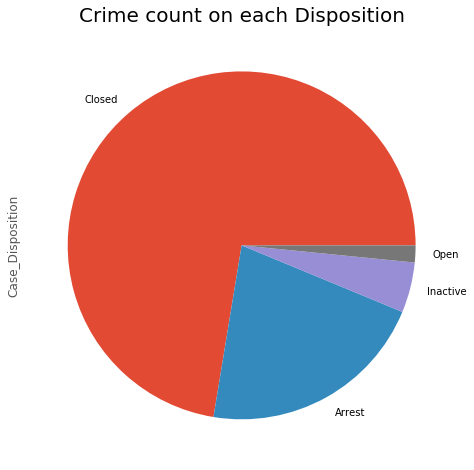

In [40]:
plt.style.use('ggplot')
Orlando_crime['Case_Disposition'].value_counts().plot.pie(figsize = (15, 8))

plt.title('Crime count on each Disposition',fontsize = 20)
plt.show()

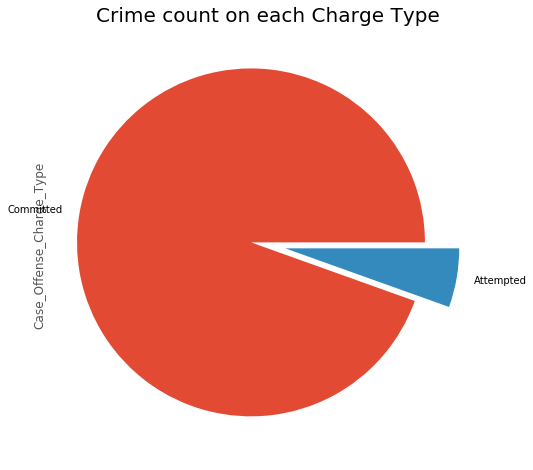

In [41]:
plt.style.use('ggplot')
Orlando_crime['Case_Offense_Charge_Type'].value_counts().plot.pie(figsize = (15, 8), explode = (0.1 , 0.1))

plt.title('Crime count on each Charge Type',fontsize = 20)
plt.show()

Ritengo ora necessario copiare il database ed effettuare una prima scrematura delle colonne poco utili per poi successivamente raggrupparle così da avere una variabile target da predire. Status, Case Disposition, Case Offense Charge Type sono informazioni utili unicamente ai fini statistici ma non nel caso di questa tipologia di studio. 

In [42]:
del Orlando_crime['Case_Location']
del Orlando_crime['Case_Offense_Charge_Type']
del Orlando_crime['Case_Disposition']
del Orlando_crime['Status']
del Orlando_crime['Case_Offense_Type']
del Orlando_crime['Location']
del Orlando_crime['Orlando_Commissioner_Districts']
del Orlando_crime['Year']


Creo due copie dell'attuale dataset al fine di effettuare due diverse analisi di regressione multivariata. Effettuerò successivamente due ulteriori diverse scremature e raggruppamenti.

In [43]:
Orlando_crime.set_index("Case_Number", inplace=True)
Study1 = Orlando_crime.copy()
Study2 = Orlando_crime.copy()
Orlando_crime

Case_Offense_Location_Type Case_Offense_Category  \
Case_Number                                                      
2014-00109569                  Residence               Assault   
2016-00475579                      Shops                 Theft   
2013-00308749                      Shops                 Theft   
2012-00308325                      Shops                 Theft   
2015-00251741                      Shops                 Theft   
...                                  ...                   ...   
2012-00480063                  Residence               Assault   
2014-00424233              Public palace                 Theft   
2013-00018215              Public palace                 Theft   
2011-00006598                  Residence              Burglary   
2011-00459993            Apartment/Condo                 Theft   

               Orlando_Neighborhoods day_of_week  Month  Day  Hour  
Case_Number                                                         
2014-00109569                      7    Saturday      3   15    13  
2016-00475579                     84      Friday     11   25    16  
2013-00308749                     84      Sunday      7   28     2  
2012-00308325                    121   Wednesday      7   25    10  
2015-00251741                     84      Friday      6   19    15  
...                              ...         ...    ...  ...   ...  
2012-00480063                     34     Tuesday     11   20     4  
2014-00424233                     14    Saturday     10   11    10  
2013-00018215                    121      Sunday      1   13    14  
2011-00006598                     23   Wednesday      1    5    13  
2011-00459993                    103      Monday     10   17    17  

[166684 rows x 7 columns]

In [44]:
del Study1['Case_Offense_Location_Type']
del Study1['Hour']
del Study1['Day']
del Study1['Month']
del Study1['Orlando_Neighborhoods']
Study1

Case_Offense_Category day_of_week
Case_Number                                    
2014-00109569               Assault    Saturday
2016-00475579                 Theft      Friday
2013-00308749                 Theft      Sunday
2012-00308325                 Theft   Wednesday
2015-00251741                 Theft      Friday
...                             ...         ...
2012-00480063               Assault     Tuesday
2014-00424233                 Theft    Saturday
2013-00018215                 Theft      Sunday
2011-00006598              Burglary   Wednesday
2011-00459993                 Theft      Monday

[166684 rows x 2 columns]

Effettuato questo raggruppamento si crea la colonna Crime_number che sarà la variabile target, ovvero una variabile continua che sta ad indicare il numeri di crimini che verranno predetti dato un giorno della settimana e un tipo di crimine

In [45]:
Crime_by_category=  Study1.groupby(["day_of_week", "Case_Offense_Category"]).size().fillna(0).astype("int64").reset_index(name="Crime_number")
#Case2['Crime_number'] =  Crime_by_category.reset_index()
Crime_by_category

day_of_week Case_Offense_Category  Crime_number
0       Friday               Assault          2648
1       Friday              Burglary          3553
2       Friday                 Fraud          1775
3       Friday             Narcotics          2689
4       Friday                 Other            64
5       Friday               Robbery           640
6       Friday                 Theft         12227
7       Friday         Vehicle Theft          1239
8       Monday               Assault          2535
9       Monday              Burglary          4337
10      Monday                 Fraud          1960
11      Monday             Narcotics          1719
12      Monday                 Other            88
13      Monday               Robbery           709
14      Monday                 Theft         13950
15      Monday         Vehicle Theft          1359
16    Saturday               Assault          3074
17    Saturday              Burglary          2591
18    Saturday                 Fraud           550
19    Saturday             Narcotics          2187
20    Saturday                 Other            59
21    Saturday               Robbery           737
22    Saturday                 Theft         10087
23    Saturday         Vehicle Theft          1109
24      Sunday               Assault          2990
25      Sunday              Burglary          2593
26      Sunday                 Fraud           401
27      Sunday             Narcotics          1606
28      Sunday                 Other            68
29      Sunday               Robbery           680
30      Sunday                 Theft          9268
31      Sunday         Vehicle Theft          1094
32    Thursday               Assault          2345
33    Thursday              Burglary          3667
34    Thursday                 Fraud          1969
35    Thursday             Narcotics          2856
36    Thursday                 Other            59
37    Thursday               Robbery           626
38    Thursday                 Theft         12197
39    Thursday         Vehicle Theft          1180
40     Tuesday               Assault          2276
41     Tuesday              Burglary          3839
42     Tuesday                 Fraud          1963
43     Tuesday             Narcotics          2767
44     Tuesday                 Other            76
45     Tuesday               Robbery           620
46     Tuesday                 Theft         12805
47     Tuesday         Vehicle Theft          1181
48   Wednesday               Assault          2482
49   Wednesday              Burglary          3843
50   Wednesday                 Fraud          1959
51   Wednesday             Narcotics          3033
52   Wednesday                 Other            67
53   Wednesday               Robbery           626
54   Wednesday                 Theft         12495
55   Wednesday         Vehicle Theft          1167

In [46]:
Study1.describe()

Case_Offense_Category day_of_week
count                 166684      166684
unique                     8           7
top                    Theft      Monday
freq                   83029       26657

In [47]:
Study1 = pd.get_dummies(Crime_by_category)
Study1

Crime_number  day_of_week_Friday  day_of_week_Monday  \
0           2648                   1                   0   
1           3553                   1                   0   
2           1775                   1                   0   
3           2689                   1                   0   
4             64                   1                   0   
5            640                   1                   0   
6          12227                   1                   0   
7           1239                   1                   0   
8           2535                   0                   1   
9           4337                   0                   1   
10          1960                   0                   1   
11          1719                   0                   1   
12            88                   0                   1   
13           709                   0                   1   
14         13950                   0                   1   
15          1359                   0                   1   
16          3074                   0                   0   
17          2591                   0                   0   
18           550                   0                   0   
19          2187                   0                   0   
20            59                   0                   0   
21           737                   0                   0   
22         10087                   0                   0   
23          1109                   0                   0   
24          2990                   0                   0   
25          2593                   0                   0   
26           401                   0                   0   
27          1606                   0                   0   
28            68                   0                   0   
29           680                   0                   0   
30          9268                   0                   0   
31          1094                   0                   0   
32          2345                   0                   0   
33          3667                   0                   0   
34          1969                   0                   0   
35          2856                   0                   0   
36            59                   0                   0   
37           626                   0                   0   
38         12197                   0                   0   
39          1180                   0                   0   
40          2276                   0                   0   
41          3839                   0                   0   
42          1963                   0                   0   
43          2767                   0                   0   
44            76                   0                   0   
45           620                   0                   0   
46         12805                   0                   0   
47          1181                   0                   0   
48          2482                   0                   0   
49          3843                   0                   0   
50          1959                   0                   0   
51          3033                   0                   0   
52            67                   0                   0   
53           626                   0                   0   
54         12495                   0                   0   
55          1167                   0                   0   

    day_of_week_Saturday  day_of_week_Sunday  day_of_week_Thursday  \
0                      0                   0                     0   
1                      0                   0                     0   
2                      0                   0                     0   
3                      0                   0                     0   
4                      0                   0                     0   
5                      0                   0                     0   
6                      0                   0                     0   
7                      

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge



Definisco l'errore relativo e una funzione stampa da utilizzare durante l'analisi a scopi comparativi

In [49]:
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [50]:
def print_eval(X, y, model):
    print("   Mean squared error: {:.5}".format(mean_squared_error(model.predict(X), y)))
    print("       Relative error: {:.5%}".format(relative_error(model.predict(X), y)))
    print("R-squared coefficient: {:.5}".format(model.score(X, y)))

Definisco la discesa al gradiente allo scopo di ricavare un valore di mse per avere un termine di confronto per quanto riguarda il valore atteso, anche solo per l'ordine di grandezza.

In [51]:
def lr_gd_step(X1, y, theta, step_size):
    # calcolo l'errore su ciascun dato d'esempio
    error = X1.dot(theta) - y
    # calcolo il gradiente dell'errore, ovvero
    # la derivata parziale di ciascun parametro
    grad = 2 / X1.shape[0] * (X1.T.dot(error))
    # calcolo il nuovo valore di tutti i parametri
    new_theta = theta - step_size * grad
    return new_theta

In [52]:
y = Study1["Crime_number"].values
X = Study1.drop(columns=["Crime_number"]).values


In [53]:
X1 = np.hstack([np.ones((X.shape[0], 1)), X])

In [54]:
theta = np.zeros(X1.shape[1])
theta_vals = [theta]
for iteration in range(150):
    theta = lr_gd_step(X1, y, theta, 0.7)
    theta_vals.append(theta)
theta_vals = np.array(theta_vals)

In [55]:
np.mean(np.square(X1.dot(theta) - y))

307177.83928571414

In [56]:
mse_vals = np.mean(np.square(X1.dot(theta_vals.T) - y[:, None]), axis=0)

Text(0, 0.5, 'MSE')

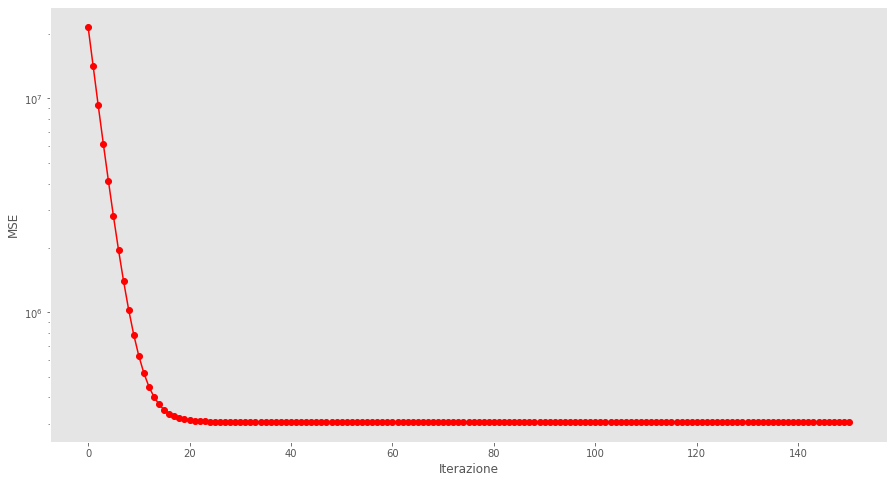

In [57]:
plt.semilogy(mse_vals, "ro-")
plt.grid()
plt.xlabel("Iterazione")
plt.ylabel("MSE")

Dal grafico ricavato dalle interazioni compiute nella discesa di grandiente l'MSE migliore che posso ricvare sarà comunque di ordine di 10 ^5

Regressione lineare

In [58]:
X_train, X_val, y_train, y_val = train_test_split(
    Study1.drop("Crime_number", axis=1),    # X = tutto tranne Crime_number
    Study1["Crime_number"],                 # y = Crime_number
    test_size=1/3, random_state=42   # parametri divisione
)

In [59]:
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
model.fit(X_train, y_train)
print_eval(X_val, y_val, model)

   Mean squared error: 5.5793e+05
       Relative error: 34.46240%
R-squared coefficient: 0.96081


In [60]:
pd.Series(model.named_steps["linreg"].coef_, X_train.columns)

day_of_week_Friday                       42.296622
day_of_week_Monday                      185.695880
day_of_week_Saturday                   -187.568815
day_of_week_Sunday                     -104.832328
day_of_week_Thursday                      1.106010
day_of_week_Tuesday                      58.302361
day_of_week_Wednesday                    29.522191
Case_Offense_Category_Assault           -60.154899
Case_Offense_Category_Burglary          167.160571
Case_Offense_Category_Fraud            -448.564791
Case_Offense_Category_Narcotics        -213.178313
Case_Offense_Category_Other            -714.422652
Case_Offense_Category_Robbery          -735.549034
Case_Offense_Category_Theft            2885.045313
Case_Offense_Category_Vehicle Theft    -685.702997
dtype: float64

Analizzando i dati tramite il modello lineare noto dal valore R^2 che ha una buona aderenza al modello perciò ritengo più importante concentrarsi sul minimizzare gli errori (RE, MSE).
Dai coefficenti posso già intuire, come era prevedibile dai grafici a barre sopra riportati, che nell'arco della settimana il weekend ha un peso ben diverso dal resto dei giorni feriali.

Definisco una funzione da poter riutilizzare per effettuare paragoni dei modelli con diversi parametri che utilizza grid serch per individuare i parametri migliori

In [61]:
def grid_test(model, grid):
    gs = GridSearchCV(model, param_grid=grid)
    gs.fit(X_train, y_train)
    print(gs.best_params_)
    print_eval(X_val, y_val, gs)

In [62]:
model = Pipeline([
    ("scale", StandardScaler()),
      ("linreg", Lasso(max_iter=150))
])
grid = {
    "linreg__alpha":    [30, 50, 70, 80, 100]
} 

grid_test(model, grid)

{'linreg__alpha': 70}
   Mean squared error: 6.0467e+05
       Relative error: 34.21167%
R-squared coefficient: 0.95753


c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91468.93240074068, tolerance: 41561.728296
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

In [63]:
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Lasso(alpha=70))
])
model.fit(X_train, y_train)
pd.Series(model.named_steps["linreg"].coef_, X_train.columns)

day_of_week_Friday                        0.000000
day_of_week_Monday                      114.213597
day_of_week_Saturday                   -166.921911
day_of_week_Sunday                      -58.087719
day_of_week_Thursday                      0.000000
day_of_week_Tuesday                       0.000000
day_of_week_Wednesday                     0.000000
Case_Offense_Category_Assault           270.406054
Case_Offense_Category_Burglary          480.979477
Case_Offense_Category_Fraud              -0.000000
Case_Offense_Category_Narcotics         135.571198
Case_Offense_Category_Other            -350.313622
Case_Offense_Category_Robbery          -283.792154
Case_Offense_Category_Theft            3198.743602
Case_Offense_Category_Vehicle Theft    -161.622579
dtype: float64

In [64]:
model = Pipeline([
    ("scale", StandardScaler()),
      ("linreg", ElasticNet())
])
grid = {
    "linreg__alpha":    [0.01, 0.5, 1, 1.5, 3, 5],
    "linreg__l1_ratio": [1, 0.1, 0.5, 0.1]
} 

grid_test(model, grid)


c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377972.8825137981, tolerance: 31874.091933333326
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261943.8489232259, tolerance: 41561.728296
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49841.33059125021, tolerance: 14300.

{'linreg__alpha': 5, 'linreg__l1_ratio': 1}
   Mean squared error: 5.5428e+05
       Relative error: 34.18503%
R-squared coefficient: 0.96107


Dai valori riportati dalla funzione best_params_ noto che l1_ratio=1 quindi è chiaro che la scelta migliore sia preferire la regolarizzazione Lasso piuttosto che la Ridge o il loro compromesso con l'Elastic net.

Aggiungo al modello precedente una Features polinomiale allo scopo di verificare se i dati possano essere meglio rappresentati con curve pittosto che con rette

In [65]:
model = Pipeline([
    ("poly",  PolynomialFeatures(include_bias=False)),
    ("scale", StandardScaler()),
    ("linreg", Lasso())
])
grid = {
    "poly__degree": [2, 3, 4, 5],
    "linreg__alpha":    [10, 20, 30, 40, 50, 70, 80]
} 

grid_test(model, grid)

c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'linreg__alpha': 40, 'poly__degree': 3}
   Mean squared error: 5.9996e+05
       Relative error: 28.11922%
R-squared coefficient: 0.95786


c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Con la Lasso ottengo già dei dati abbastanza buoni. Decido quindi di creare due funzioni per poter graficare e mettere a paragone l'andamento dell'R^2 e dell' ER all'aumento del grado del polinomio.

In [66]:
def test_regression(degree, alpha):
    model = Pipeline([
        ("poly",  PolynomialFeatures(degree=degree, include_bias=False)),
        ("scale", StandardScaler()),
        ("linreg", Lasso(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    return model.score(X_val, y_val)

In [67]:
def test_regression_err(degree, alpha):
    model = Pipeline([
        ("poly",  PolynomialFeatures(degree=degree, include_bias=False)),
        ("scale", StandardScaler()),
        ("linreg", Lasso(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    return np.mean(np.abs((model.predict(X_val) - y_val) / model.predict(X_val)))

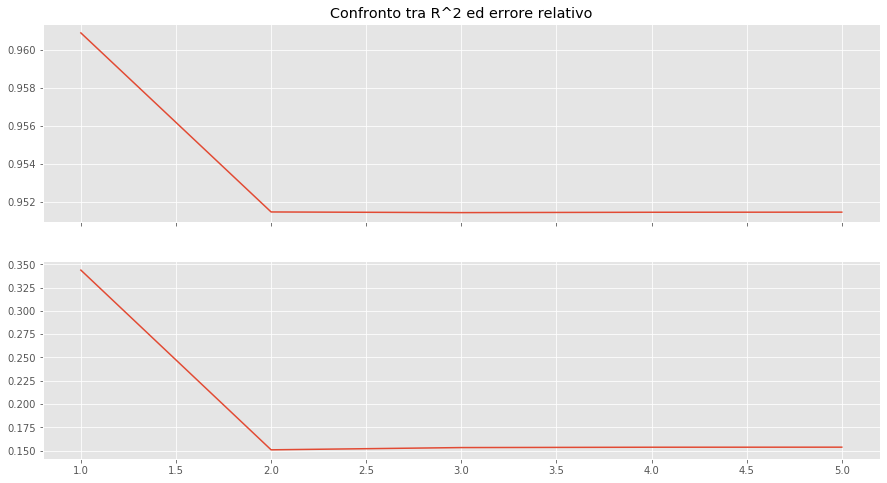

In [68]:
degrees = range(1, 6, 1)
scores = [test_regression(d,1.5) for d in degrees]
e_rel = [test_regression_err(d,1.5) for d in degrees]
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(degrees, scores)
axarr[0].set_title('Confronto tra R^2 ed errore relativo')
axarr[1].plot(degrees, e_rel)


Graficando insieme l'R^2 e l'errore relativo risulta evidente che non sia necessario studiare il data set con polinomi di gradi più alti poichè non è presente un miglioramento all'aumento del grado del polinomio ed è anche per questo che ritengo inutile creare un modello con il kernel. Si nota anche che al grado 1 l'R^2 è migliore, ma peggiore l'RE e viceversa nel grado 2, ritengo che sia preferibile utilizzare il secondo grado poichè la perdità di 0,01 in R^2 è meno significativa della perdita di 0.2 nell'errore relativo.

(Non viene graficato l'MSE poichè ha chiaramente una curva di crescita simile all'errore relativo ma su una scala diversa.)

Ritengo Kfold la suddivisione più adatta ed affidabile per questo dataset, ripeto quindi il modello che prima è risultato migliore con i dati divisi con la tecnica k fold per ottenere un' R^2 ancora più affidabile.

In [69]:
y = Study1["Crime_number"].values
X = Study1.drop(columns=["Crime_number"]).values

In [70]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=42)

In [71]:
from sklearn.metrics import make_scorer

In [72]:
from sklearn.model_selection import cross_val_score
model = Pipeline([
        ("poly",  PolynomialFeatures(degree=2, include_bias=False)),
        ("scale", StandardScaler()),
        ("linreg", Lasso(alpha=1.5))
])
scores = cross_val_score(model, X, y, cv=kf)

In [73]:
scores

array([0.96641608, 0.95220843, 0.55176954, 0.84955107, 0.96216487])

In [74]:
mse_low = make_scorer(mean_squared_error)

In [75]:
MSE= cross_val_score(model, X, y,scoring = mse_low, cv=kf)

Questi sono l'R^2 e l'MSE finali del modello polinomiale con regressione Lasso per la predizione di crimini data un giorno della settimana e una specifica categoria di crimini

In [76]:
scores.mean(), scores.std()

(0.8564219977653945, 0.1583133762948539)

In [77]:
MSE.mean(), MSE.std()

(590852.69448212, 319383.48127640027)

Effettuo ora il secondo studio partendo dal dataset Study2 (copia di Orlando_crime) con una diversa scrematura per svolgere un diverso caso di studio.

In [78]:
Study2

Case_Offense_Location_Type Case_Offense_Category  \
Case_Number                                                      
2014-00109569                  Residence               Assault   
2016-00475579                      Shops                 Theft   
2013-00308749                      Shops                 Theft   
2012-00308325                      Shops                 Theft   
2015-00251741                      Shops                 Theft   
...                                  ...                   ...   
2012-00480063                  Residence               Assault   
2014-00424233              Public palace                 Theft   
2013-00018215              Public palace                 Theft   
2011-00006598                  Residence              Burglary   
2011-00459993            Apartment/Condo                 Theft   

               Orlando_Neighborhoods day_of_week  Month  Day  Hour  
Case_Number                                                         
2014-00109569                      7    Saturday      3   15    13  
2016-00475579                     84      Friday     11   25    16  
2013-00308749                     84      Sunday      7   28     2  
2012-00308325                    121   Wednesday      7   25    10  
2015-00251741                     84      Friday      6   19    15  
...                              ...         ...    ...  ...   ...  
2012-00480063                     34     Tuesday     11   20     4  
2014-00424233                     14    Saturday     10   11    10  
2013-00018215                    121      Sunday      1   13    14  
2011-00006598                     23   Wednesday      1    5    13  
2011-00459993                    103      Monday     10   17    17  

[166684 rows x 7 columns]

Ora partendo dal dataser Study2 (copia di Orlando_crime) effettuo una diversa scrematura per svolgere un diverso caso di studio.

In [79]:
del Study2['Day']
del Study2['Month']
del Study2['Orlando_Neighborhoods']
del Study2['Case_Offense_Location_Type']
Study2['Hour']=Study2['Hour'].astype('category')

In [80]:
Study2

Case_Offense_Category day_of_week Hour
Case_Number                                         
2014-00109569               Assault    Saturday   13
2016-00475579                 Theft      Friday   16
2013-00308749                 Theft      Sunday    2
2012-00308325                 Theft   Wednesday   10
2015-00251741                 Theft      Friday   15
...                             ...         ...  ...
2012-00480063               Assault     Tuesday    4
2014-00424233                 Theft    Saturday   10
2013-00018215                 Theft      Sunday   14
2011-00006598              Burglary   Wednesday   13
2011-00459993                 Theft      Monday   17

[166684 rows x 3 columns]

In [81]:
Crime_n=  Study2.groupby(["day_of_week", "Case_Offense_Category", "Hour"]).size().fillna(0).astype("int64").reset_index(name="Crime_number")
Crime_n

day_of_week Case_Offense_Category Hour  Crime_number
0         Friday               Assault    0           115
1         Friday               Assault    1           146
2         Friday               Assault    2           212
3         Friday               Assault    3            93
4         Friday               Assault    4            44
...          ...                   ...  ...           ...
1326   Wednesday         Vehicle Theft   19            28
1327   Wednesday         Vehicle Theft   20            34
1328   Wednesday         Vehicle Theft   21            32
1329   Wednesday         Vehicle Theft   22            28
1330   Wednesday         Vehicle Theft   23            24

[1331 rows x 4 columns]

In [82]:
Study2= pd.get_dummies(Crime_n)
Study2.head()

Crime_number  day_of_week_Friday  day_of_week_Monday  day_of_week_Saturday  \
0           115                   1                   0                     0   
1           146                   1                   0                     0   
2           212                   1                   0                     0   
3            93                   1                   0                     0   
4            44                   1                   0                     0   

   day_of_week_Sunday  day_of_week_Thursday  day_of_week_Tuesday  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   
3                   0                     0                    0   
4                   0                     0                    0   

   day_of_week_Wednesday  Case_Offense_Category_Assault  \
0                      0                              1   
1                      0                              1   
2                      0                              1   
3                      0                              1   
4                      0                              1   

   Case_Offense_Category_Burglary  ...  Hour_14  Hour_15  Hour_16  Hour_17  \
0                               0  ...        0        0        0        0   
1                               0  ...        0        0        0        0   
2                               0  ...        0        0        0        0   
3                               0  ...        0        0        0        0   
4                               0  ...        0        0        0        0   

   Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 40 columns]

Provo ora alcuni modelli per poter studiare i coefficenti e di conseguenza capire quali features sono importanti.

In [83]:
X_train, X_val, y_train, y_val = train_test_split(
    Study1.drop("Crime_number", axis=1),    # X = tutto tranne Crime_number
    Study1["Crime_number"],                 # y = Crime_number
    test_size=1/3, random_state=42   # parametri divisione
)

In [84]:
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linreg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [85]:
print_eval(X_val, y_val, model)

   Mean squared error: 5.5793e+05
       Relative error: 34.46240%
R-squared coefficient: 0.96081


In [86]:
pd.Series(model.named_steps["linreg"].coef_, X_train.columns)

day_of_week_Friday                       42.296622
day_of_week_Monday                      185.695880
day_of_week_Saturday                   -187.568815
day_of_week_Sunday                     -104.832328
day_of_week_Thursday                      1.106010
day_of_week_Tuesday                      58.302361
day_of_week_Wednesday                    29.522191
Case_Offense_Category_Assault           -60.154899
Case_Offense_Category_Burglary          167.160571
Case_Offense_Category_Fraud            -448.564791
Case_Offense_Category_Narcotics        -213.178313
Case_Offense_Category_Other            -714.422652
Case_Offense_Category_Robbery          -735.549034
Case_Offense_Category_Theft            2885.045313
Case_Offense_Category_Vehicle Theft    -685.702997
dtype: float64

Da questo primo approccio sembra che la regressione lineare non dia ottimi risultati, passo dunque ad analisi diverse

In [87]:
model = Pipeline([
    ("scale", StandardScaler()),
      ("linreg", Lasso(max_iter=150))
])
grid = {
    "linreg__alpha":    [0.5, 0.8, 1, 1.5, 2]
} 

grid_test(model, grid)

{'linreg__alpha': 2}
   Mean squared error: 5.55e+05
       Relative error: 34.30631%
R-squared coefficient: 0.96102


c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422967.30457940605, tolerance: 31874.091933333326
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297480.2210557023, tolerance: 41561.728296
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60302.041243866086, tolerance: 1430

In [88]:
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Lasso(alpha=1.5))
])
model.fit(X_train, y_train)
pd.Series(model.named_steps["linreg"].coef_, X_train.columns)

day_of_week_Friday                       18.409237
day_of_week_Monday                      157.109863
day_of_week_Saturday                   -216.031017
day_of_week_Sunday                     -132.780690
day_of_week_Thursday                    -24.319273
day_of_week_Tuesday                      27.697962
day_of_week_Wednesday                     0.000000
Case_Offense_Category_Assault           152.273088
Case_Offense_Category_Burglary          361.096559
Case_Offense_Category_Fraud            -251.603658
Case_Offense_Category_Narcotics           0.000000
Case_Offense_Category_Other            -542.474501
Case_Offense_Category_Robbery          -520.470822
Case_Offense_Category_Theft            3078.345372
Case_Offense_Category_Vehicle Theft    -438.698299
dtype: float64

Questa prima analisi serve per capire quali features risultino essere importanti e come può risultare conveniente cambiarle. In questo caso credo sia meglio raggruppare le ore in fasce orarie. Sembrava utile raggruppare anche i giorni della settimana in weekday e week end, poichè i coefficenti del weekend risultano diversi da quelli del weekday, ma i modelli che ho testato risultavano molto inprecisi e con errori estremamente alti.

In [89]:
Study2v2 = Orlando_crime.copy()

In [90]:
del Study2v2['Day']
del Study2v2['Month']
del Study2v2['Orlando_Neighborhoods']
del Study2v2['Case_Offense_Location_Type']
#Study2v2['Hour']=Study2v2['Hour'].astype('category')

Study2v2['Hour'].replace([0, 1, 2], "0-2" , inplace=True)
Study2v2['Hour'].replace([3, 4, 5], "3-5" , inplace=True)
Study2v2['Hour'].replace([6, 7, 8], "6-8" , inplace=True)
Study2v2['Hour'].replace([9, 10, 11], "9-11" , inplace=True)
Study2v2['Hour'].replace([12, 13, 14], "12-14" , inplace=True)
Study2v2['Hour'].replace([15, 16, 17], "15-17" , inplace=True)
Study2v2['Hour'].replace([18, 19, 20], "18-20" , inplace=True)
Study2v2['Hour'].replace([21, 22, 23], "21-23" , inplace=True)
#Study2v2['day_of_week'].replace(["Saturday", "Sunday"], "weekend" , inplace=True)
#Study2v2['day_of_week'].replace(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], "weekday" , inplace=True)


In [91]:
Study2v2['Hour'] = pd.cut(Study2v2['Hour'], [0, 2, 5, 8, 11, 14, 17, 20, 23])

In [92]:
Study2v2

Case_Offense_Category day_of_week      Hour
Case_Number                                              
2014-00109569               Assault    Saturday  (11, 14]
2016-00475579                 Theft      Friday  (14, 17]
2013-00308749                 Theft      Sunday    (0, 2]
2012-00308325                 Theft   Wednesday   (8, 11]
2015-00251741                 Theft      Friday  (14, 17]
...                             ...         ...       ...
2012-00480063               Assault     Tuesday    (2, 5]
2014-00424233                 Theft    Saturday   (8, 11]
2013-00018215                 Theft      Sunday  (11, 14]
2011-00006598              Burglary   Wednesday  (11, 14]
2011-00459993                 Theft      Monday  (14, 17]

[166684 rows x 3 columns]

Raggruppo anche in questo caso in modo da ottenere una variabile target continua chiamata Crime_number, allo scopo di predire il numero di crimini dato uno specifico giorno della settimana, tipologia di crimine e fascia oraria

In [93]:
Crime_n =  Study2v2.groupby(["day_of_week", "Case_Offense_Category", "Hour"]).size().fillna(0).astype("int64").reset_index(name="Crime_number")
Crime_n

day_of_week Case_Offense_Category      Hour  Crime_number
0        Friday               Assault    (0, 2]           358
1        Friday               Assault    (2, 5]           163
2        Friday               Assault    (5, 8]           145
3        Friday               Assault   (8, 11]           288
4        Friday               Assault  (11, 14]           333
..          ...                   ...       ...           ...
443   Wednesday         Vehicle Theft   (8, 11]           217
444   Wednesday         Vehicle Theft  (11, 14]           201
445   Wednesday         Vehicle Theft  (14, 17]           156
446   Wednesday         Vehicle Theft  (17, 20]           103
447   Wednesday         Vehicle Theft  (20, 23]            84

[448 rows x 4 columns]

In [94]:
Study2v2= pd.get_dummies(Crime_n)

In [95]:
X_train, X_val, y_train, y_val = train_test_split(
    Study2v2.drop("Crime_number", axis=1),    # X = tutto tranne Crime_number
    Study2v2["Crime_number"],                 # y = Crime_number
    test_size=1/3, random_state=42   # parametri divisione
)

In [96]:
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Lasso(alpha=5))
])
model.fit(X_train, y_train)
pd.Series(model.named_steps["linreg"].coef_, X_train.columns)

day_of_week_Friday                      -0.000000
day_of_week_Monday                       0.887355
day_of_week_Saturday                   -11.382129
day_of_week_Sunday                     -31.480249
day_of_week_Thursday                    -0.000000
day_of_week_Tuesday                      7.644337
day_of_week_Wednesday                   12.080527
Case_Offense_Category_Assault           38.224924
Case_Offense_Category_Burglary          68.421161
Case_Offense_Category_Fraud             -0.000000
Case_Offense_Category_Narcotics         12.500646
Case_Offense_Category_Other            -59.606862
Case_Offense_Category_Robbery          -34.162134
Case_Offense_Category_Theft            426.739297
Case_Offense_Category_Vehicle Theft    -11.608393
Hour_(0, 2]                            -75.270725
Hour_(2, 5]                            -71.862202
Hour_(5, 8]                            -37.624198
Hour_(8, 11]                            34.831633
Hour_(11, 14]                           56.596912


Anche qui lo studio del gradiente è al solo scopo informativo

In [97]:
X1 = np.hstack([np.ones((X.shape[0], 1)), X])

In [98]:
theta = np.zeros(X1.shape[1])
theta_vals = [theta]
for iteration in range(150):
    theta = lr_gd_step(X1, y, theta, 0.5)
    theta_vals.append(theta)
theta_vals = np.array(theta_vals)

In [99]:
np.mean(np.square(X1.dot(theta) - y))

307177.83928571426

Text(0, 0.5, 'MSE')

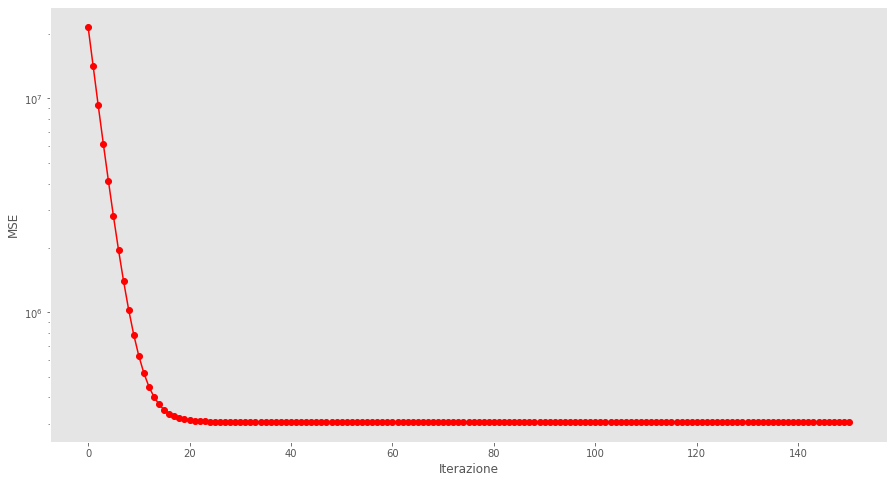

In [100]:
plt.semilogy(mse_vals, "ro-")
plt.grid()
plt.xlabel("Iterazione")
plt.ylabel("MSE")

In [101]:
model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", LinearRegression())
])
model.fit(X_train, y_train)
print_eval(X_val, y_val, model)

   Mean squared error: 9.7487e+04
       Relative error: 205.89190%
R-squared coefficient: 0.65431


L'approccio lineare continua a non essere la scelta migliore, perciò continuo con uno studio più improntato su modelli polinomiali

In [102]:
model = Pipeline([
    ("scale", StandardScaler()),
      ("linreg", ElasticNet(max_iter=250))
])
grid = {
    "linreg__alpha":    [0.01, 0.5, 0.8, 1],
    "linreg__l1_ratio": [1, 0.8, 0.5, 0.1, 0.01, 0]
} 

grid_test(model, grid)

c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2116484.590397412, tolerance: 7121.101386363636
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333070.83599379845, tolerance: 6648.9640693467345
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1528479.390190228, tolerance: 

{'linreg__alpha': 1, 'linreg__l1_ratio': 1}
   Mean squared error: 9.6956e+04
       Relative error: 191.60068%
R-squared coefficient: 0.65619


c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22013106.816846207, tolerance: 7121.101386363636
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19248813.09444324, tolerance: 6648.9640693467345
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15595245.383402554, tolerance: 4993.589586934675
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This wil

In [103]:
model = Pipeline([
     ("poly",  PolynomialFeatures(include_bias=False)),
    ("scale", StandardScaler()),
      ("linreg", ElasticNet())
])
grid = {
    "poly__degree": [2, 3, 4, 5],   
    "linreg__alpha":    [0.1, 0.5, 1, 1.5, 2],
    "linreg__l1_ratio": [1.3, 1, 0.9, 0.1 ,0.01]
} 

grid_test(model, grid)

c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23442.45357105328, tolerance: 7121.101386363636
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19609.587245905714, tolerance: 6648.9640693467345
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56375.96831131121, tolerance: 

{'linreg__alpha': 1, 'linreg__l1_ratio': 0.9, 'poly__degree': 2}
   Mean squared error: 1.5836e+04
       Relative error: 65.83890%
R-squared coefficient: 0.94384


c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
c:\users\utente\foo\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Aggiungendo una features polinomiare otteniamo già l'RE dimezzato

In [104]:
def test_regression(degree, alpha,l1_ratio):
    model = Pipeline([
        ("poly",  PolynomialFeatures(degree=degree, include_bias=False)),
        ("scale", StandardScaler()),
        ("linreg", ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
    ])
    model.fit(X_train, y_train)
    return model.score(X_val, y_val)

In [105]:
def test_regression_err(degree, alpha,l1_ratio):
    model = Pipeline([
        ("poly",  PolynomialFeatures(degree=degree, include_bias=False)),
        ("scale", StandardScaler()),
        ("linreg", ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=150))
    ])
    model.fit(X_train, y_train)
    return np.mean(np.abs((model.predict(X_val) - y_val) / model.predict(X_val)))

In [106]:
degrees = range(1, 6, 1)
scores = [test_regression(d, 0.1, 0.1) for d in degrees]
e_rel = [test_regression_err(d,  0.1, 0.1) for d in degrees]
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(degrees, scores)
axarr[0].set_title('Confronto tra R^2 ed errore relativo')
axarr[1].plot(degrees, e_rel)

c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189009.65298588428, tolerance: 9393.407547986579
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160098.29355332963, tolerance: 9393.407547986579
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41497.48205187707, tolerance: 9393.407547986579
  positive)
c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612559.0099133907,

In [107]:
 model = Pipeline([
        ("poly",  PolynomialFeatures(degree=4, include_bias=False)),
        ("scale", StandardScaler()),
        ("linreg", ElasticNet(alpha=0.1, l1_ratio=0.1))
    ])
model.fit(X_train, y_train)
print_eval(X_val, y_val, model)

c:\users\utente\foo\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189009.65298588428, tolerance: 9393.407547986579
  positive)


   Mean squared error: 3.9945e+04
       Relative error: 44.72475%
R-squared coefficient: 0.85836


In [108]:
def test_regression(degree, alpha):
    model = Pipeline([
        ("poly",  PolynomialFeatures(degree=degree, include_bias=False)),
        ("scale", StandardScaler()),
        ("regr",  Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    return model.score(X_val, y_val)

In [109]:
def test_regression_err(degree, alpha):
    model = Pipeline([
        ("poly",  PolynomialFeatures(degree=degree, include_bias=False)),
        ("scale", StandardScaler()),
        ("regr",  Ridge(alpha=alpha))
    ])
    model.fit(X_train, y_train)
    return np.mean(np.abs((model.predict(X_val) - y_val) / model.predict(X_val)))

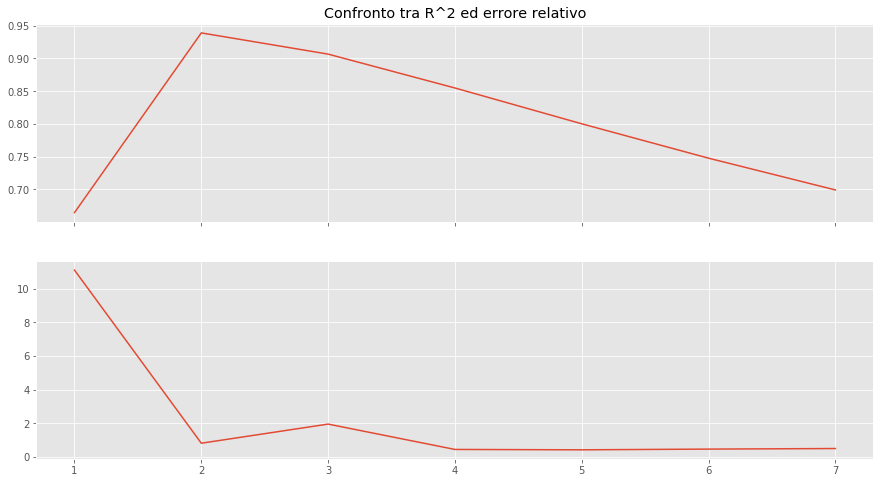

In [110]:
degrees = range(1, 8, 1)
scores = [test_regression(d, 50) for d in degrees]
e_rel = [test_regression_err(d, 50) for d in degrees]
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(degrees, scores)
axarr[0].set_title('Confronto tra R^2 ed errore relativo')
axarr[1].plot(degrees, e_rel)

Questi due grafici di confronto, il primo ottenuto dall'elasticNet e il secondo dalla Ridge, sono estremamente simili ed entrambi rivelano come con il grado 1 RE ed R^2 abbiano entrambi dei valori insoddisfacenti, aumentando al grado 2 nel primo caso migliorano entrambi mentre nel secondo caso R^2 migliora notevolmente a discapito di un peggioramento dell'RE. Con i gradi 3 e 4 abbiamo un miglioramento irregolare dell'RE ed un lieve peggioramento dell'R^2. Per i gradi superiori al quarto è palese il subentro dell'overfitting quindi non ha senso studiare gradi maggiori. 

In [111]:
 model = Pipeline([
        ("poly",  PolynomialFeatures(degree=3, include_bias=False)),
        ("scale", StandardScaler()),
        ("regr",  Ridge(alpha=50))
    ])
model.fit(X_train, y_train)
print_eval(X_val, y_val, model)

   Mean squared error: 2.6328e+04
       Relative error: 196.09073%
R-squared coefficient: 0.90664


In [112]:
print_eval(X_train, y_train, model)

   Mean squared error: 308.21
       Relative error: 29.32950%
R-squared coefficient: 0.99902


Ho effettuato anche dei test con kernel. Il polinomiale risulta inutile poiché anche in questo caso non ho un miglioramento all'aumentare del grado bensì un peggioramento. Il Radial basis function si è dimostrato altrettanto inefficinte 

Ritengo Kfold la suddivisione più adatta ed affidabile per questo dataset, ripeto quindi il modello che prima è risultato migliore con i dati divisi con la tecnica k fold per ottenere un R^2 ancora più affidabile.


In [113]:
y = Study2v2["Crime_number"].values 
X = Study2v2.drop(columns=["Crime_number"]).values

In [114]:
kf = KFold(5, shuffle=True, random_state=42)



In [115]:
 model = Pipeline([
        ("poly",  PolynomialFeatures(degree=3, include_bias=False)),
        ("scale", StandardScaler()),
        ("regr",  Ridge(alpha=50))
    ])
model.fit(X_train, y_train)
print_eval(X_val, y_val, model)

   Mean squared error: 2.6328e+04
       Relative error: 196.09073%
R-squared coefficient: 0.90664


In [116]:
scores = cross_val_score(model, X, y, cv=kf)

In [117]:
scores

array([0.90670048, 0.9410971 , 0.91432557, 0.84438419, 0.92595696])

In [118]:
mse_low = make_scorer(mean_squared_error)

MSE= cross_val_score(model, X, y,scoring = mse_low, cv=kf)

Questi sono l'R^2 e l'MSE finali del modello polinomiale con regressione Ridge per la predizione di crimini dato un giorno della settimana, una specifica categoria di crimini ed una fascia oraria.

In [119]:
scores.mean(), scores.std()


(0.9064928602765965, 0.033151729899371596)

In [120]:
MSE.mean(), MSE.std()

(27635.545437597, 10691.544294742751)